## Exercise

1. Import the `housing.csv` dataset from the datasets directory. This dataset contains information about houses sold in Kings County (California) such as price, surface etc. **Note** that this is not exactly the same dataset as `kc_house_data.csv`!

2. Predict the ```price``` using first only the ```grade``` and then the ```grade```, ```bedrooms``` and ```bathrooms``` columns

3. Compute the mean square error for both models. Which one is better and how big is the difference?

4. Make a pairplot with the ```bedrooms```, ```grade``` and ```price``` columns. Do you see anything special regarding the ```bedrooms``` data? If yes try to fix it and rerun the above analysis. What do you observe?

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/digital-sustainability/SAI3-2025/refs/heads/main/datasets/housing.csv"
)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,good_bad
0,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,0
1,3362400511,20150304T000000,570000.0,3,1.75,1260,3328,1.0,0,0,...,700,560,1905,0,98103,47.6823,-122.349,1380,3536,0
2,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,...,1590,0,2010,0,98103,47.6824,-122.347,1620,3166,1
3,2331300505,20140613T000000,822500.0,5,3.50,2320,4960,2.0,0,0,...,1720,600,1926,0,98103,47.6763,-122.352,1700,4960,0
4,1994200024,20141104T000000,511000.0,3,1.00,1430,3455,1.0,0,0,...,980,450,1947,0,98103,47.6873,-122.336,1450,4599,0


In [2]:
from sklearn import linear_model

# Instantiate two linear models
model_single_feature = linear_model.LinearRegression()
model_multiple_features = linear_model.LinearRegression()

# Fit the models
model_single_feature.fit(X=df[['grade']], y=df['price'])
model_multiple_features.fit(X=df[['grade', 'bedrooms', 'bathrooms']], y=df['price'])

# Generate predictions
predictions_single_feature = model_single_feature.predict(df[['grade']])
predictions_multiple_features = model_multiple_features.predict(df[['grade', 'bedrooms', 'bathrooms']])

In [3]:
from sklearn.metrics import mean_squared_error

# Compute the mean squared error for the single feature model
mse_single_feature = mean_squared_error(df['price'], predictions_single_feature)

# Compute the mean squared error for the multiple feature model
mse_multiple_features = mean_squared_error(df['price'], predictions_multiple_features)

print(f"Mean Squared Error for single feature model: {mse_single_feature:.2e}")
print(f"Mean Squared Error for multiple feature model: {mse_multiple_features:.2e}")

print(f"Difference in MSE: {mse_single_feature - mse_multiple_features:.2e}")

Mean Squared Error for single feature model: 3.58e+10
Mean Squared Error for multiple feature model: 3.27e+10
Difference in MSE: 3.19e+09


We see that the errors are very large for both models, but the model with multiple features as input worked better. The difference in MSE between the two models is 3.19 billion.

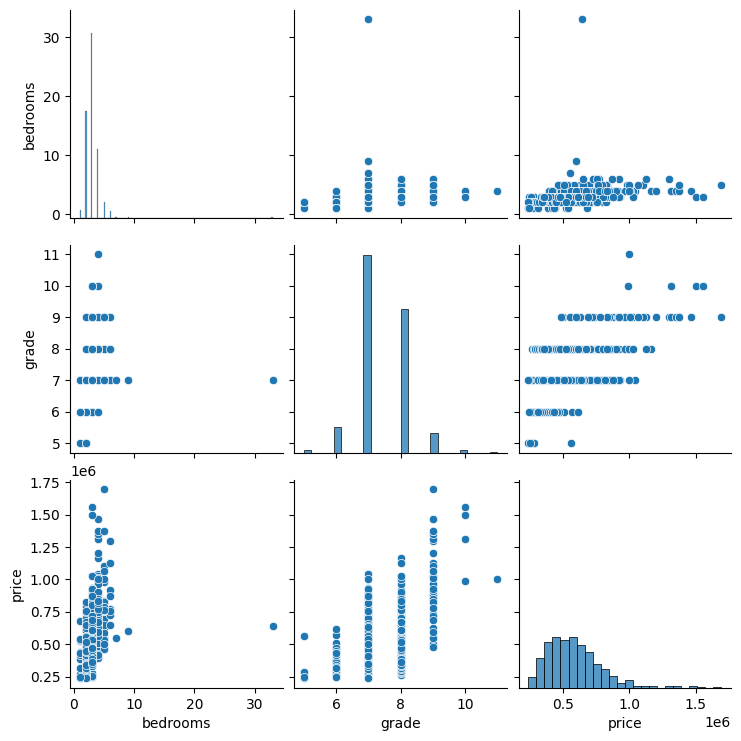

In [4]:
import seaborn as sns
sns.pairplot(df[['bedrooms', 'grade', 'price']]);

We see that we have very few houses with a lot of bedrooms. Since these are outliers, we can try to remove them and see if that improves the error when fitting the model again.

In [5]:
df_filtered = df[df.bedrooms <= 8]

# Fit the models
model_single_feature.fit(X=df_filtered[["grade"]], y=df_filtered["price"])
model_multiple_features.fit(X=df_filtered[["grade", "bedrooms", "bathrooms"]], y=df_filtered["price"])

# Generate predictions
predictions_single_feature = model_single_feature.predict(df_filtered[["grade"]])
predictions_multiple_features = model_multiple_features.predict(df_filtered[["grade", "bedrooms", "bathrooms"]])

# Compute the mean squared error for the single feature model
mse_single_feature = mean_squared_error(df_filtered["price"], predictions_single_feature)

# Compute the mean squared error for the multiple feature model
mse_multiple_features = mean_squared_error(df_filtered["price"], predictions_multiple_features)

print(f"Mean Squared Error for single feature model: {mse_single_feature:.2e}")
print(f"Mean Squared Error for multiple feature model: {mse_multiple_features:.2e}")

print(f"Difference in MSE: {mse_single_feature - mse_multiple_features:.2e}")

Mean Squared Error for single feature model: 3.59e+10
Mean Squared Error for multiple feature model: 2.89e+10
Difference in MSE: 7.04e+09


We see that the MSE for the model with a single feature did not change much (only a little bit due to the removal of some probably high priced houses). For the second model, we see an improvement. Before, the difference in MSE between the two models was 3.19 billion, now this difference more than doubled, meaning that the model with multiple features performed much better after removing the outliers than before.